## Loan Status Prediction Using ML

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loan_prediction.csv')

### 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(614, 13)

In [6]:
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  614
Number of Columns:  13


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Missing Percentage

data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 6. Handling The missing Values

In [10]:
# dropping Loan_ID column entirely

data = data.drop('Loan_ID', axis=1)

In [11]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [12]:
# making a list of columns with missing percentage < 5%

columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [13]:
# dropping rows and columns with missing percentage less than 5%

data = data.dropna(subset=columns) # as default axis=0 (meaning drop rows which contain missing values)

In [14]:
# checking missing percentage again

data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

- All columns, except **'Self_Employed'** and **'Credit_History'** are handled and these column's missing percentage is more than 5%, so we can't delete row them, we've to fill the missing values with appropriate values.


In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [17]:
data['Self_Employed'].mode()[0]

'No'

In [18]:
data['Credit_History'].mode()[0]

1.0

In [19]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [20]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [21]:
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

- **All missing values are handled.**

### 7. Handling Categorical Columns

In [22]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
602,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
64,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
108,Male,Yes,2,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban,N


In [23]:
# replace 3+ with 3

data['Dependents'] = data['Dependents'].replace(to_replace="3+",value='3')

In [24]:
data['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [25]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

#### Encoding

As machines only understand 0's and 1's. We've to convert our categorical columns to 0's and 1's.

In [26]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### 8. Store Feature Matrix In X And Response (Target) In Vector y

In [28]:
X = data.drop('Loan_Status', axis=1)

In [29]:
y = data['Loan_Status']

### 9. Feature Scaling

In [30]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


- *Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property_Area* values are in the same range.
- Scaling the rest. If these are not scale, then Features with higher value range starts dominating in calculating distances b/w features.

- **Distance based Algorithms:**<br>
 1. K-nearest Neighbour <br>
 2. Neural Networking. <br>
 3. Support vector machine. <br>
 4. Linear Regression. <br>
 5. Logistic Regression. <br>

- ML algorithm which don't need feature scaling are **Non-linear algorithms**. like *Decision Tree, Random Forest, Gradient Bost, Naive Bayes*, etc.
- Any algorithm, which is not distance based is not affected by feature scaling. 

In [31]:
# making a list of columns that we need to scale

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [32]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X[cols] = st.fit_transform(X[cols])

In [33]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,3,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


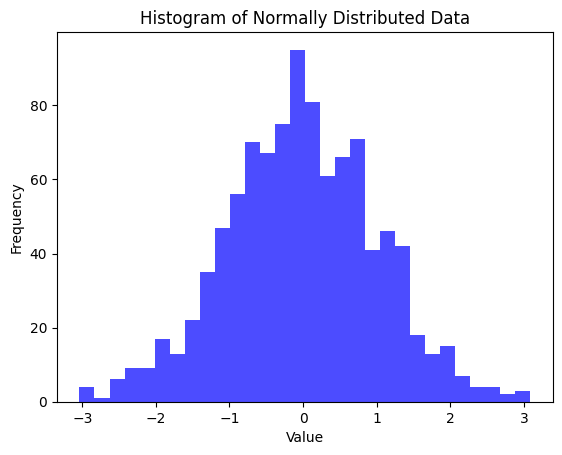

In [122]:
import matplotlib.pyplot as plt
import numpy as np
# Generating random data
outlierData = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(outlierData, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

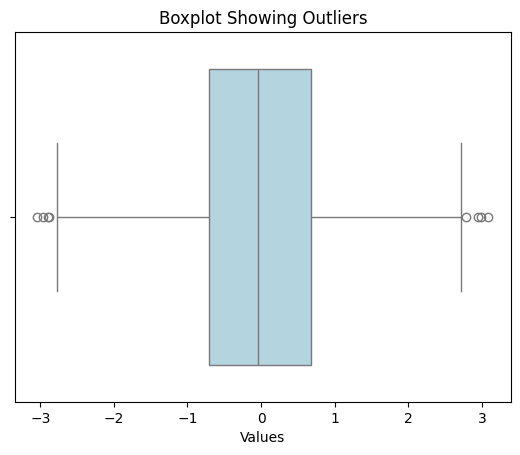

In [123]:
import seaborn as sns
sns.boxplot(x=outlierData, color='lightblue')
plt.title('Boxplot Showing Outliers')
plt.xlabel('Values')
plt.show()

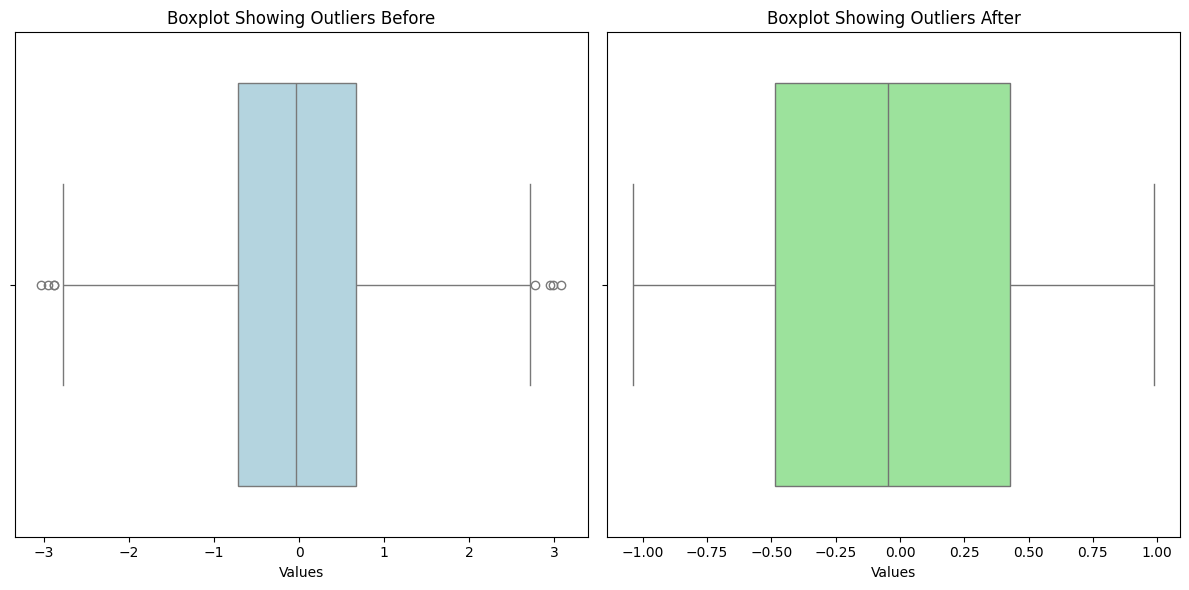

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Before removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=outlierData, color='lightblue')
plt.title('Boxplot Showing Outliers Before')
plt.xlabel('Values')

# Calculate Z-scores
z_scores = np.abs(stats.zscore(outlierData))

# Define a threshold for identifying outliers (e.g., 3)
threshold = 1
filtered_data = outlierData[z_scores < threshold]

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data, color='lightgreen')
plt.title('Boxplot Showing Outliers After')
plt.xlabel('Values')

plt.tight_layout()
plt.show()


### 10. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np


In [37]:
def model_val(model, X, y):
    # Check types
    print(f"Type of X: {type(X)}")
    print(f"Type of y: {type(y)}")
    
    # Ensure X and y are not strings
    if isinstance(X, str) or isinstance(y, str):
        raise ValueError("X and y should be array-like, not strings")
    
    # Check shapes
    if hasattr(X, 'shape') and hasattr(y, 'shape'):
        print(f"X shape: {X.shape}")
        print(f"y shape: {y.shape}")
    else:
        raise ValueError("X and y must have the attribute 'shape'")
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("Mismatch between number of samples in X and y")

    # Splitting dataset for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Asking model for prediction
    y_pred = model.predict(X_test)
    
    # Checking model's prediction accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multi-class classification
    
    print(f"{model} Accuracy: {accuracy}")
    print(f"{model} Precision: {precision}")
    print(f"{model} Recall: {recall}")
    
    # To find the best model, use cross-validation
    score = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    
    avg_score = np.mean(score)
    print(f"{model} Avg cross-validation score: {avg_score}")
    
    # Store metrics in dictionary
    model_df[model] = {
        'Avg CV Score': round(avg_score * 100, 2),
        'Accuracy': round(accuracy * 100, 2),
        'Precision': round(precision * 100, 2),
        'Recall': round(recall * 100, 2)
    }


Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
X shape: (100, 10)
y shape: (100,)


NameError: name 'precision_score' is not defined

### 11. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# passing this model object of LogisticRegression Class in the function we've created
model_val(model,X,y)

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>
X shape: (553, 11)
y shape: (553,)


NameError: name 'precision_score' is not defined

In [254]:
model_df

{LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 40.0,
  'Precision': 40.81,
  'Recall': 40.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,
  'Accuracy': 55.0,
  'Precision': 54.58,
  'Recall': 55.0},
 GradientBoostingClassifier(): {'Avg CV Score': 44.0,
  'Accuracy': 45.0,
  'Precision': 45.5,
  'Recall': 45.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0}}

### 12. SVC (Support Vector Classifier)

In [255]:
from sklearn import svm

model = svm.SVC()
model_val(model,X,y)

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
X shape: (100, 10)
y shape: (100,)
SVC() Accuracy: 0.45
SVC() Precision: 0.4625
SVC() Recall: 0.45
SVC() Avg cross-validation score: 0.45


In [256]:
model_df

{LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 40.0,
  'Precision': 40.81,
  'Recall': 40.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,
  'Accuracy': 55.0,
  'Precision': 54.58,
  'Recall': 55.0},
 GradientBoostingClassifier(): {'Avg CV Score': 44.0,
  'Accuracy': 45.0,
  'Precision': 45.5,
  'Recall': 45.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0}}

### 13. Decision Tree Classifier

In [257]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_val(model,X,y)

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
X shape: (100, 10)
y shape: (100,)
DecisionTreeClassifier() Accuracy: 0.5
DecisionTreeClassifier() Precision: 0.48901098901098894
DecisionTreeClassifier() Recall: 0.5
DecisionTreeClassifier() Avg cross-validation score: 0.51


In [258]:
model_df

{LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 40.0,
  'Precision': 40.81,
  'Recall': 40.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,
  'Accuracy': 55.0,
  'Precision': 54.58,
  'Recall': 55.0},
 GradientBoostingClassifier(): {'Avg CV Score': 44.0,
  'Accuracy': 45.0,
  'Precision': 45.5,
  'Recall': 45.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 50.0,
  'Precision': 48.9,
  'Recall': 50.0}}

### 14. Random Forest Classifier

In [259]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier()
model_val(model,X,y)

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
X shape: (100, 10)
y shape: (100,)
RandomForestClassifier() Accuracy: 0.5
RandomForestClassifier() Precision: 0.5
RandomForestClassifier() Recall: 0.5
RandomForestClassifier() Avg cross-validation score: 0.42000000000000004


In [260]:
model_df

{LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 40.0,
  'Precision': 40.81,
  'Recall': 40.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,
  'Accuracy': 55.0,
  'Precision': 54.58,
  'Recall': 55.0},
 GradientBoostingClassifier(): {'Avg CV Score': 44.0,
  'Accuracy': 45.0,
  'Precision': 45.5,
  'Recall': 45.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 50.0,
  'Precision': 48.9,
  'Recall': 50.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,

### 15. Gradient Boosting Classifier

In [261]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model_val(model,X,y)

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
X shape: (100, 10)
y shape: (100,)
GradientBoostingClassifier() Accuracy: 0.45
GradientBoostingClassifier() Precision: 0.45499999999999996
GradientBoostingClassifier() Recall: 0.45
GradientBoostingClassifier() Avg cross-validation score: 0.45999999999999996


In [262]:
model_df

{LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 40.0,
  'Precision': 40.81,
  'Recall': 40.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,
  'Accuracy': 55.0,
  'Precision': 54.58,
  'Recall': 55.0},
 GradientBoostingClassifier(): {'Avg CV Score': 44.0,
  'Accuracy': 45.0,
  'Precision': 45.5,
  'Recall': 45.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 LogisticRegression(): {'Avg CV Score': 48.0,
  'Accuracy': 50.0,
  'Precision': 51.01,
  'Recall': 50.0},
 SVC(): {'Avg CV Score': 45.0,
  'Accuracy': 45.0,
  'Precision': 46.25,
  'Recall': 45.0},
 DecisionTreeClassifier(): {'Avg CV Score': 51.0,
  'Accuracy': 50.0,
  'Precision': 48.9,
  'Recall': 50.0},
 RandomForestClassifier(): {'Avg CV Score': 42.0,

- Clearly, **LogisticRegression is the best model with accuracy 80.48.**
- ***But, we've trained our model with default parameters of Logistic Regression. Same with other algorithms as well.***

### 16. HyperParameter Tuning

In ML, there are two types of parameters:
   1. Model parameters
   2. Hyper parameters
    
**Model Parameters:** are parameters that model will learn during training phase. <br>
  For Example, y = mx + c. For Linear Regression, model will learn 'm' and 'c' during training phase.
so, **m** and **c** are called as **model parameters.**

**Hyper Parameters:** This are adjustable parameters that must by tuned in order to obtain a model with optimal performance.<br>
                  ML models can have many hyper parameters and finding best combination of parameters can be treated as **"Search Problem"**.
        
There are two best strategies for hyper parameter tuning.
1. **Grid Search CV** - go thru all the intermediate combination of parameters which make it computationally very expensive.
2. **Randomized Search CV** - it solve the drawbacks of GridSearchCV, as it goes thru only fixed no. of hyper parameter settings. it moves within a grid in random fashion to find best set of hyper parameter.

We'll we using Randomized Search CV

In [213]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [214]:
# Let's tune hyper parameters of LogisticRegression (we've choosen 'C' and 'solver' parameter for tuning)

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

In [215]:
# In RandomizedSearchCV we've to pass estimator, which is nothing but Algo class, It will return
# a model with it's Hyper Parameter already set and we've to train that model, with our dataset

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                   param_distributions = log_reg_grid,
                   n_iter=20, cv=5, verbose=True)

In [216]:
# Let's train our model with these set hyper parameters for optimized results.

rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [217]:
rs_log_reg.best_score_

0.8047829647829647

In [218]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

### SVC (Support Vector Classifier)

In [219]:
svc_grid = {'C':[0.25,0.50,0.75,1],
            "kernel":["linear"]}

In [220]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions = svc_grid,
                  cv=5,
                  n_iter=20,
                  verbose=True)

In [221]:
rs_svc.fit(X,y)

c:\Users\kk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [222]:
rs_svc.best_score_

0.8066011466011467

- **Earlier it was 79.39. So there is some improvement.**

In [223]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

###  Random Forest Classifier

In [224]:
rf_grid = {'n_estimators':np.arange(10,1000,10),
           'max_features':['log2','sqrt'],
           'max_depth':[None,3,5,10,20,30],
           'min_samples_split':[2,5,20,50,100],
           'min_samples_leaf':[1,2,5,10]
          }

In [225]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions = rf_grid,
                  cv=5,
                  n_iter=20,
                  verbose=True)

In [226]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [227]:
rs_rf.best_score_

0.8066011466011467

In [228]:
rs_rf.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 20}

In [ ]:
LogisticRegression score Before Hyperparameter Tuning: 80.48
LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
SVC score Before Hyperparameter Tuning: 79.38
SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
RandomForestClassifier score Before Hyperparameter Tuning: 77.76
RandomForestClassifier score after Hyperparameter Tuning: 80.66 

> Selecting **Random Forest Classifier** for Production with **80.66** accuracy. Earlier it was Logistic Regression with 80.48.

### 17. Save The Model

**Before we save our best model RandomForestClassifier for Production, we've to train our Model on the entire dataset with best parameters that we've just found.**

In [229]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [230]:
rf = RandomForestClassifier(n_estimators = 270,
                            min_samples_split = 5,
                            min_samples_leaf = 5,
                            max_features = 'sqrt',
                            max_depth = 5)

In [231]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

#### Saving our model, so that we've don't have to train it again.

In [232]:
import joblib

In [233]:
# saving our model by passing an instance of our model and giving it a name.

joblib.dump(rf,'loan_status_predictor_model')

['loan_status_predictor_model']

In [234]:
# In Future, we can perform predictin using this saved model, as shown below

model = joblib.load('loan_status_predictor_model')

In [237]:
import pandas as pd

df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [238]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [239]:
result = model.predict(df)

In [240]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# GUI

In [241]:
from tkinter import *
import joblib
import pandas as pd

In [242]:
def show_entry():
    try:
        # Get inputs from entry fields and convert to float
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())
        p8 = float(e8.get())
        p9 = float(e9.get())
        p10 = float(e10.get())
        p11 = float(e11.get())
        
        # Loading the model and making predictions
        model = joblib.load('loan_status_predictor_model')
        df = pd.DataFrame({
            'Gender': p1,
            'Married': p2,
            'Dependents': p3,
            'Education': p4,
            'Self_Employed': p5,
            'ApplicantIncome': p6,
            'CoapplicantIncome': p7,
            'LoanAmount': p8,
            'Loan_Amount_Term': p9,
            'Credit_History': p10,
            'Property_Area': p11
        }, index=[0])
        
        result = model.predict(df)

        # Show result on screen
        if result == 1:
            result_label.config(text="Loan Approved!!", fg="green")
        else:
            result_label.config(text="Loan Not Approved!!", fg="red")
    
    except ValueError:
        result_label.config(text="Input Error: Please enter valid numeric values!", fg="red")

# Main GUI window
master = Tk()
master.title("Loan Status Prediction Using Machine Learning")
master.configure(bg="#f0f0f0")

# Title Label
Label(master, text="Loan Status Prediction", bg="black", fg="white", font=("Helvetica", 16, "bold"), pady=10).pack()

# Input Frame
input_frame = Frame(master, bg="#f0f0f0")
input_frame.pack(padx=20, pady=10)

# Input Labels and Entries
labels = [
    "Gender [1:Male, 0:Female]", 
    "Married [1:Yes, 0:No]", 
    "Dependents [0, 1, 2, 3+]", 
    "Education [1:Graduate, 0:Not Graduate]",
    "Self_Employed [1:Yes, 0:No]", 
    "Applicant Income", 
    "Coapplicant Income", 
    "Loan Amount", 
    "Loan Amount Term", 
    "Credit History [1:Good, 0:Bad]", 
    "Property Area [1:Urban, 2:Semiurban, 3:Rural]"
]

entries = []
for i, label_text in enumerate(labels):
    Label(input_frame, text=label_text, font=("Helvetica", 10), bg="#f0f0f0").grid(row=i, column=0, padx=10, pady=5, sticky=E)
    entry = Entry(input_frame, width=20)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11 = entries

# Result Label
result_label = Label(master, text="", font=("Helvetica", 12), bg="#f0f0f0")
result_label.pack(pady=10)

# Predict Button
Button(master, text="Predict", command=show_entry, bg="#bc2a50", fg="white", font=("Helvetica", 12, "bold"), padx=10, pady=5).pack(pady=20)

# Run the application
master.mainloop()
